# 8.3.4 Detección de outliers usando Local Outlier Factor

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import KernelDensity

import warnings
warnings.filterwarnings("ignore")

Link: https://youtu.be/83GCJoeZFsw?si=Du7Ix7PA84DKbPyV

Links: https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html

Essta metodología computa un score (local outlier factor) que refleja el grado de anormalidad de las observaciones. El método se basa en medir la densidad local respecto a sus vecinos. La siguiente figura contiene ocho puntos con dos clusters de concentración (cuatro puntos por cluster), más un outlier en $x=4.1$.

Haciendo una analogía con el **KDE**, se estima la pdf sin tener en cuenta el punto marcado con la línea negra. Note el efecto cuando el punto ignorado en el **KDE** esta en una región poblada o despoblada.

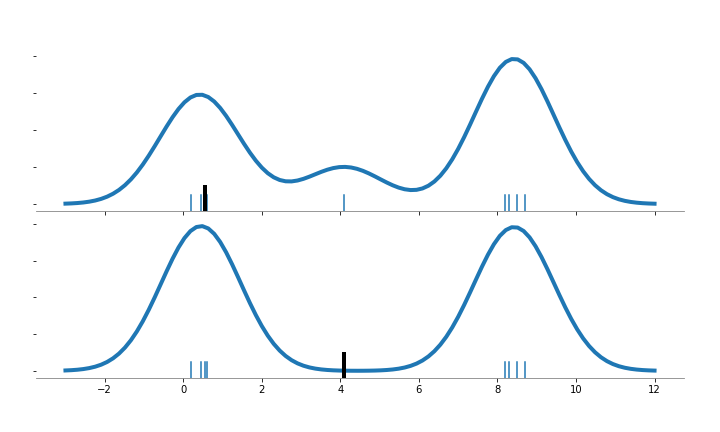

Esta técnica usa la metodología de vecinos más cercanos. A cada punto se le da un score que es el promedio de sus $k$ vecinos más cercanos.

El número de vecinos debería ser: 

- a. mayor que el mínimo número de puntos que debería contener un cluster
- b. menor que máximo número de puntos que deben aparecer en un cluster. En la práctica se recomienda que sea 20.

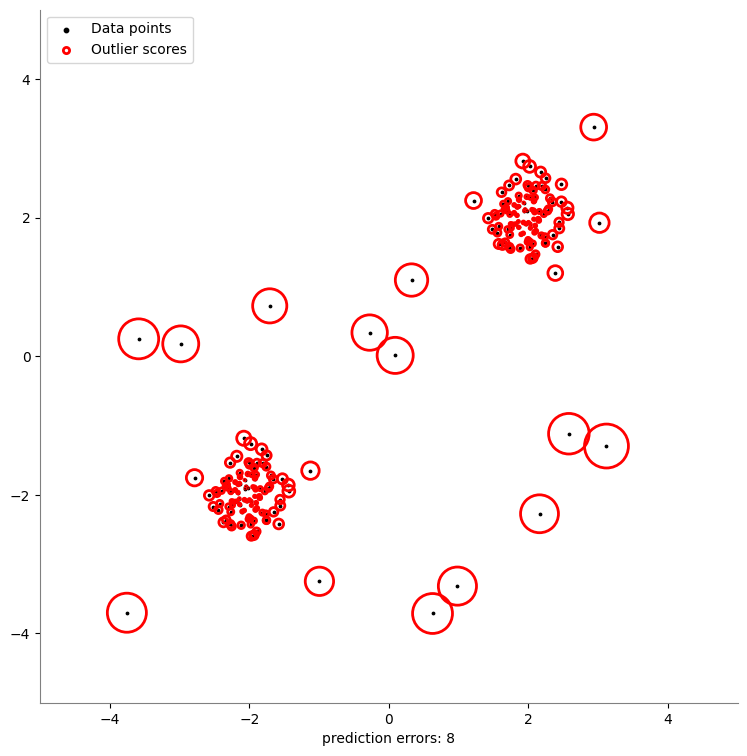

In [3]:
np.random.seed(42)

X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1


clf = LocalOutlierFactor(
    # -----------------------------------------------------
    # Number of neighbors to use by default for kneighbors
    # queries
    n_neighbors=20,
    # -----------------------------------------------------
    # Algorithm used to compute the nearest neighbors
    #   'ball_tree'
    #   'kd_tree'
    #   'brute'
    #   'auto'
    algorithm="auto",
    # -----------------------------------------------------
    # The amount of contamination of the data set, i.e. the
    # proportion of outliers in the data set.
    contamination=0.1,
)
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.figure(figsize=(9, 9))

plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")

radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
    linewidths=2,
)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))

legend = plt.legend(loc="upper left")
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]

plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.show()

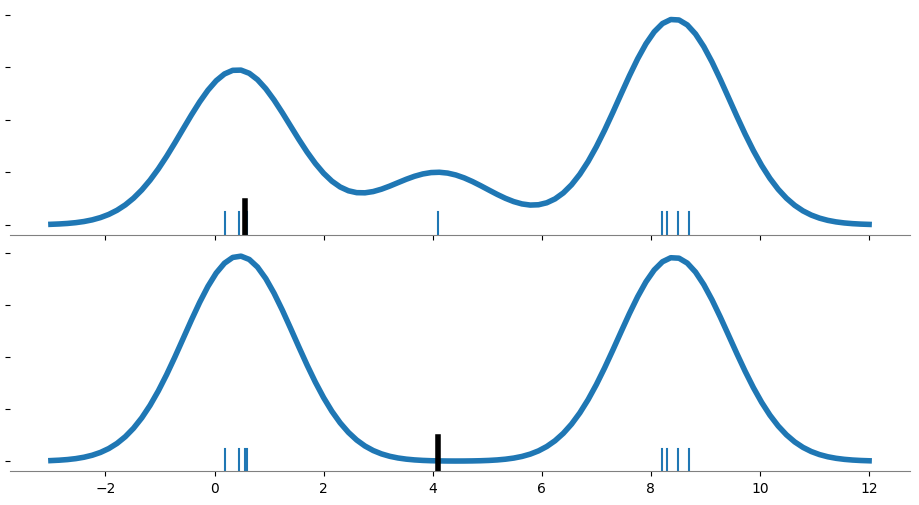

In [4]:
def figura_auxiliar():
    def format_plot(i_plot):
        ax[i_plot].spines["left"].set_visible(False)
        ax[i_plot].spines["bottom"].set_color("gray")
        ax[i_plot].spines["top"].set_visible(False)
        ax[i_plot].spines["right"].set_visible(False)
        plt.setp(ax[i_plot].get_yticklabels(), visible=False)

    x_data = [0.2, 0.45, 0.6, 0.55]
    x_data += [8.2, 8.5, 8.3, 8.7]
    x_data += [4.1]
    n_points = len(x_data)

    x_plot = np.linspace(-3, 12, 100)[:, None]

    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
    fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)

    for i_plot, i_point in enumerate([3, 8]):

        x_sample = x_data.copy()
        del x_sample[i_point]

        x_sample = np.array(x_sample)[:, None]

        kernelDensity = KernelDensity(kernel="gaussian").fit(x_sample)
        log_dens = kernelDensity.score_samples(x_plot)

        ax[i_plot].plot(x_plot, np.exp(log_dens), "-", color="tab:blue", linewidth=4)
        format_plot(i_plot)

        for x_ in x_sample:
            ax[i_plot].axvline(x_, 0, 0.1)

        ax[i_plot].axvline(x_data[i_point], 0, 0.15, color="k", linewidth=4)

    # plt.savefig("images/local_outlier_kde.png")

figura_auxiliar()

In [5]:
print('ok_')

ok_
